In [1]:
%matplotlib inline
import pandas as pd

In [2]:
# Load the Berkeley Earth Land & Ocean Dataset
url = 'http://berkeleyearth.lbl.gov/auto/Global/Land_and_Ocean_complete.txt'
# url = 'Land_and_Ocean_complete.txt'
data = pd.read_csv(url, sep='\s+', comment='%',
            usecols=(0, 1, 2),
            names=('year', 'month', 'anomaly'))

In [3]:
data

,year,month,anomaly
0,1850,1,-0.730
1,1850,2,-0.073
2,1850,3,-0.340
3,1850,4,-0.627
4,1850,5,-0.735
5,1850,6,-0.418
6,1850,7,-0.272
7,1850,8,-0.241
8,1850,9,-0.515
9,1850,10,-0.658


In [4]:
# Dataset has two different temperature estimations
data = data[data.year >= 1980].drop_duplicates(subset=('year', 'month'), keep='last')

In [5]:
data.index = data.apply(
    lambda x: pd.datetime.strptime(
        '{:.0f} {:.0f}'.format(x['year'], x['month']), '%Y %m'),
    axis=1)
data = data.drop(['year', 'month'], axis=1)

In [6]:
data.tail(5)

,anomaly
2016-11-01,0.664
2016-12-01,0.727
2017-01-01,0.853
2017-02-01,0.932
2017-03-01,0.973


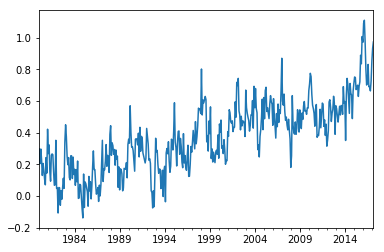

In [7]:
data.anomaly.plot()

In [8]:
yearly = data.rolling(window=12)

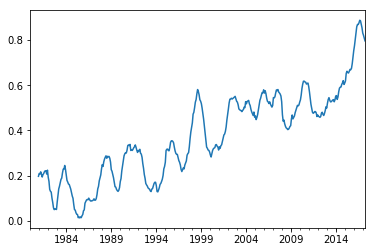

In [9]:
yearly.anomaly.mean().plot()

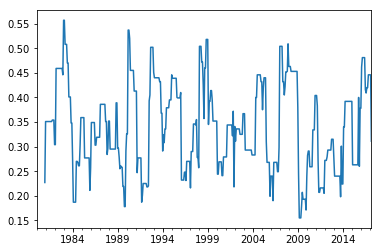

In [10]:
(yearly.anomaly.max() - yearly.anomaly.min()).plot()

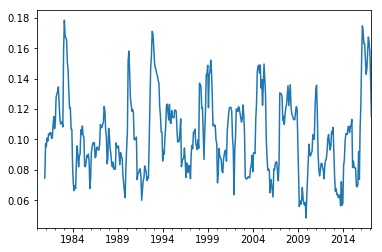

In [11]:
yearly.anomaly.std().plot()

In [12]:
lustrum = data.rolling(window=60)

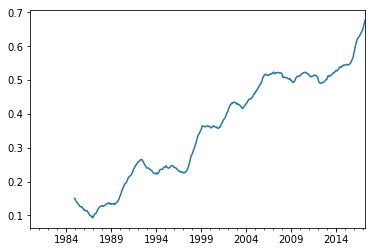

In [13]:
lustrum.anomaly.mean().plot()